In [1]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
# Read the list of five-letter words from the text file
with open('words.txt', 'r') as file:
    words = [line.strip() for line in file if len(line.strip()) == 5]

# Count the frequency of each letter in the list of words
letter_counts = Counter("".join(words))

# Convert the counter to a DataFrame for better visualization
letter_counts_df = pd.DataFrame.from_dict(letter_counts, orient='index', columns=['Count']).reset_index()
letter_counts_df = letter_counts_df.rename(columns={'index': 'Letter'}).sort_values(by='Count', ascending=False)

# Display the DataFrame
print(letter_counts_df)

   Letter  Count
5       e   7455
2       s   7319
3       a   7128
1       o   5212
0       r   4714
9       i   4381
21      l   3780
6       t   3707
23      n   3478
12      u   2927
18      d   2735
13      p   2436
22      m   2414
7       y   2400
11      c   2246
14      h   1993
15      g   1864
19      b   1849
16      k   1753
20      f   1240
8       w   1127
25      v    801
10      z    503
4       j    342
24      x    326
17      q    145


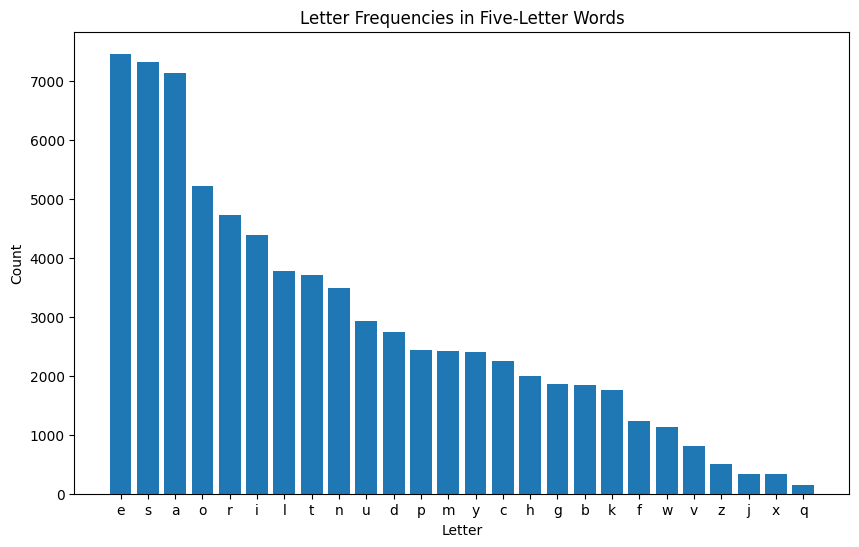

In [3]:
# Plot the letter frequencies
plt.figure(figsize=(10, 6))
plt.bar(letter_counts_df['Letter'], letter_counts_df['Count'])
plt.xlabel('Letter')
plt.ylabel('Count')
plt.title('Letter Frequencies in Five-Letter Words')
plt.show()

In [16]:
from collections import Counter

# Read the list of five-letter words from the text file
with open('words.txt', 'r') as file:
    words = [line.strip() for line in file if len(line.strip()) == 5]

# Function to filter words based on specific criteria, exclusion list, and exclude positions for certain letters
def filter_words(words, criteria, exclude_letters, exclude_positions_for_letters):
    def is_valid_word(word):
        # Check criteria for specific positions
        if not all(word[position] == char for position, char in criteria.items()):
            return False
        # Exclude words containing letters from the exclude list
        if any(char in exclude_letters for char in word):
            return False
        # Exclude words that have specific letters in specific positions
        if any(word[pos] == letter for letter, positions in exclude_positions_for_letters.items() for pos in positions):
            return False
        return True

    filtered_words = [word for word in words if is_valid_word(word)]
    return filtered_words

# Function to calculate letter frequencies for specific positions
def calculate_frequencies(words, exclude_positions):
    letter_counts = Counter()
    for word in words:
        for i, char in enumerate(word):
            if i not in exclude_positions:
                letter_counts[char] += 1
    return letter_counts

# Function to score words based on letter frequencies for remaining positions
def score_words(words, frequencies, exclude_positions):
    def word_score(word):
        return sum(frequencies[char] for i, char in enumerate(word) if i not in exclude_positions)
    
    sorted_words = sorted(words, key=word_score, reverse=True)
    return sorted_words

# Example criteria and exclusions
criteria = {0: 's', 3: 'u', 1: 'e'}
exclude_letters = {'f', 'i', 'y', 'c', 'o', 't', 'p', 'g'}
exclude_positions_for_letters = {'e': [2], 'r': [3, 4]}
exclude_positions = set(criteria.keys())

# Get the filtered words
filtered_words = filter_words(words, criteria, exclude_letters, exclude_positions_for_letters)

# Calculate letter frequencies for remaining positions
frequencies = calculate_frequencies(filtered_words, exclude_positions)

# Print frequencies for debugging
print(f"Letter frequencies: {frequencies}")

# Sort the filtered words based on the letter frequencies
sorted_filtered_words = score_words(filtered_words, frequencies, exclude_positions)

# Print the sorted filtered words
print(sorted_filtered_words)

Letter frequencies: Counter({'m': 3, 'd': 1, 'b': 1, 'r': 1})
['sedum', 'sebum', 'serum']
